### Comparing Classifiers


In [16]:
### 1. Introduction and Understanding the Business Problem

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Introduction
print("Bank Telemarketing Success Prediction")
print("=====================================\n")
print("This analysis aims to predict the success of bank telemarketing campaigns for selling bank products.")


Bank Telemarketing Success Prediction

This analysis aims to predict the success of bank telemarketing campaigns for selling bank products.


In [18]:
### 2. Data Loading

In [19]:
# Load the dataset
file_path = 'data/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')
print("Data loaded successfully. Here are the first few rows:")
print(data.head())


Data loaded successfully. Here are the first few rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

 

In [20]:
### 3. Data Exploration and Preprocessing

In [21]:
# Basic data exploration
print("\nData Exploration:")
print(data.describe())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Splitting the dataset into features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Data Exploration:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840

In [22]:
### 4. Model Building and Evaluation

In [23]:
### 4.1 K-Nearest Neighbors (KNN)

In [24]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# Evaluation
print("K-Nearest Neighbors Evaluation:")
print(classification_report(y_test, knn_predictions))


K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.60      0.40      0.48      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357



In [25]:
### 4.2 Logistic Regression

In [26]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_predictions = logreg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Evaluation:")
print(classification_report(y_test, logreg_predictions))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [27]:
### 4.3 Decision Tree

In [28]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

# Evaluation
print("Decision Tree Evaluation:")
print(classification_report(y_test, dtree_predictions))


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [29]:
### 4.4 Support Vector Machine (SVM)

In [30]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)

# Evaluation
print("Support Vector Machine Evaluation:")
print(classification_report(y_test, svm_predictions))


Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.38      0.49      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [31]:
### Visualizations

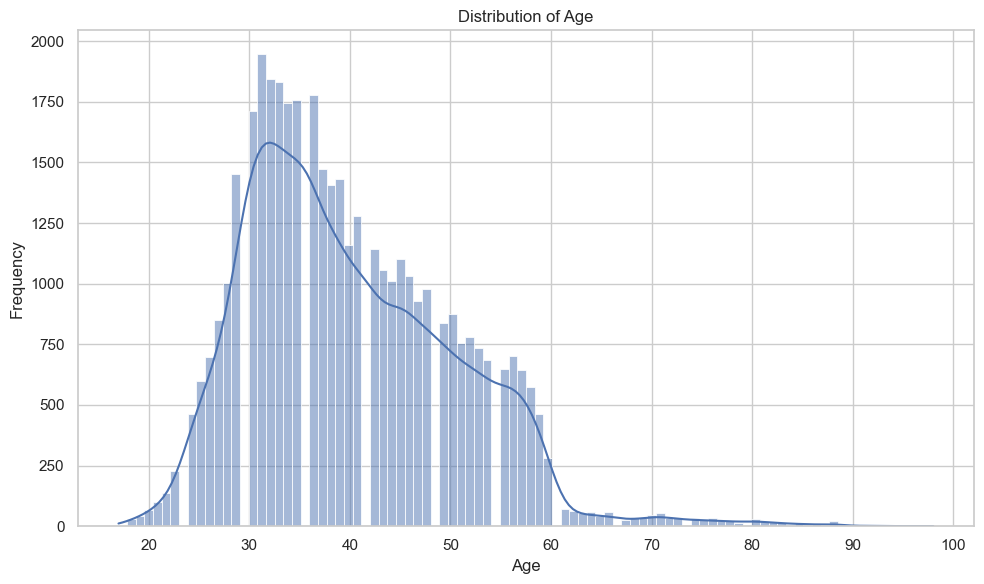

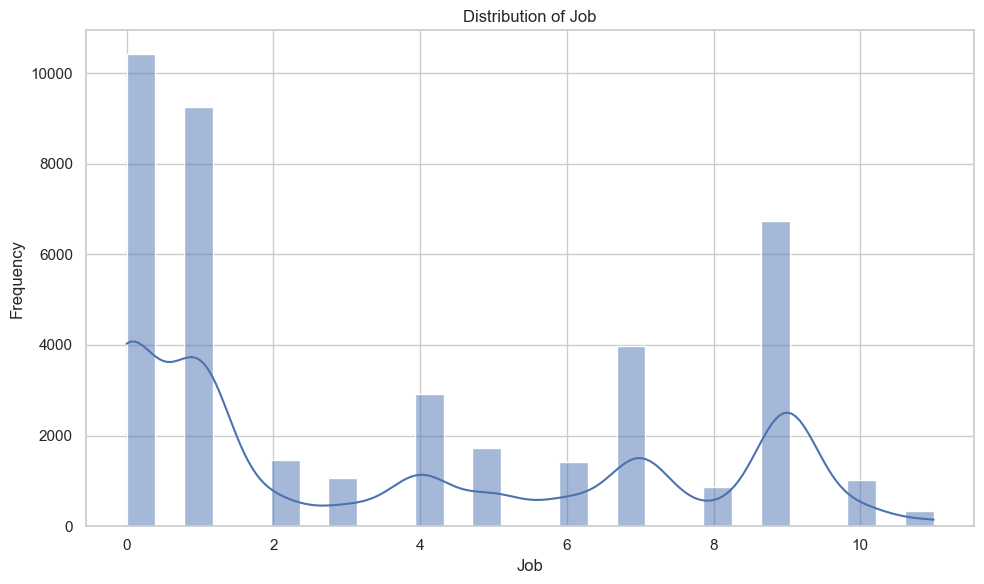

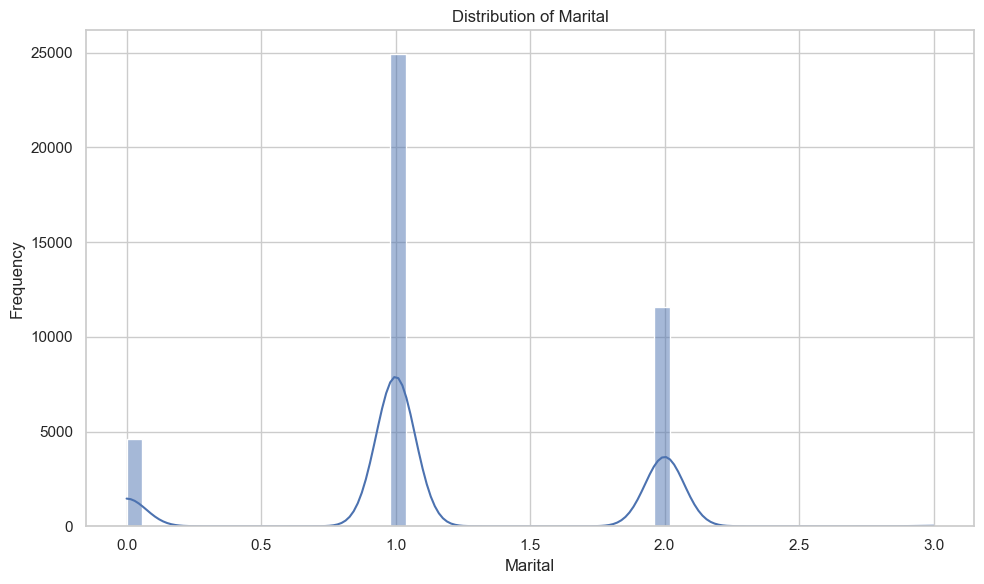

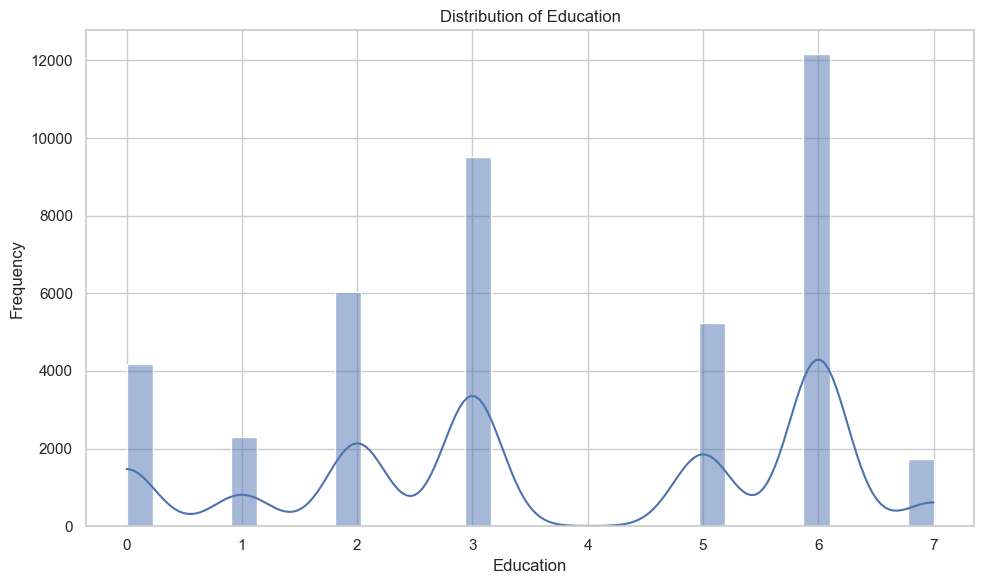

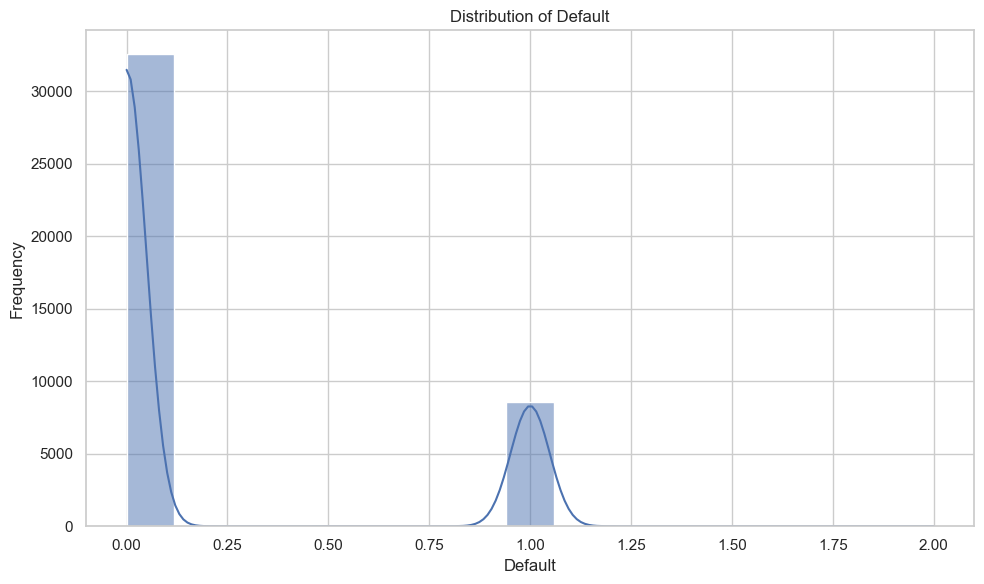

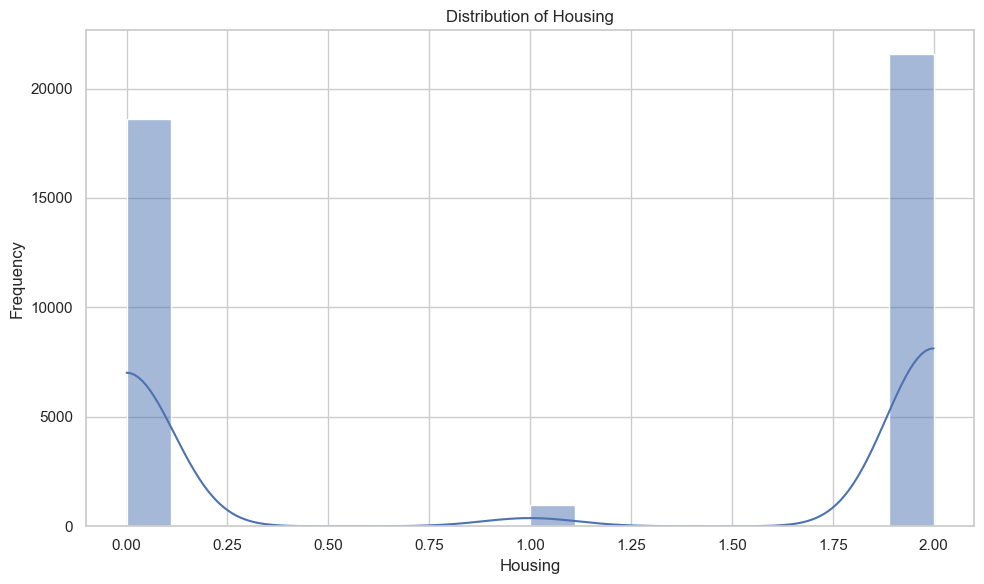

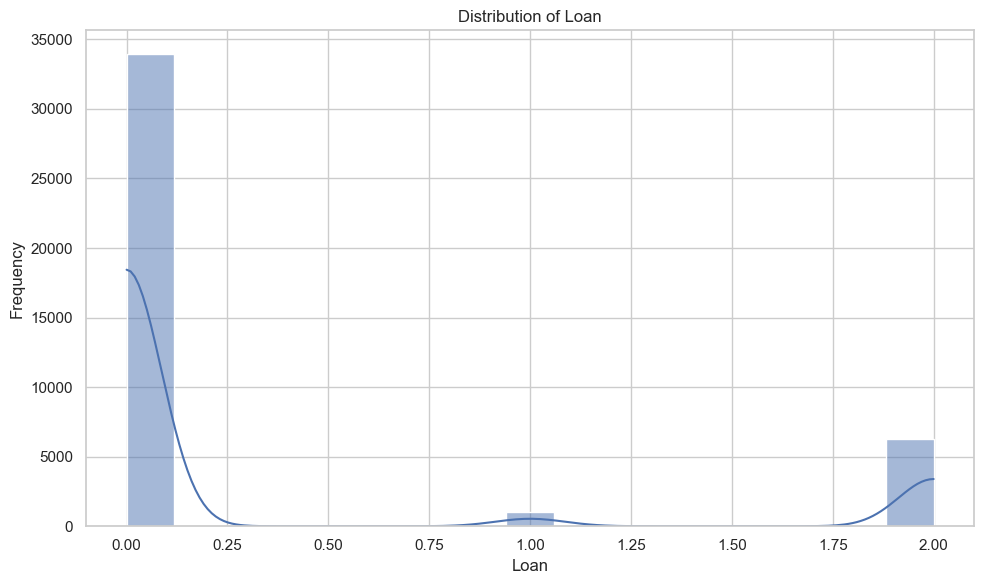

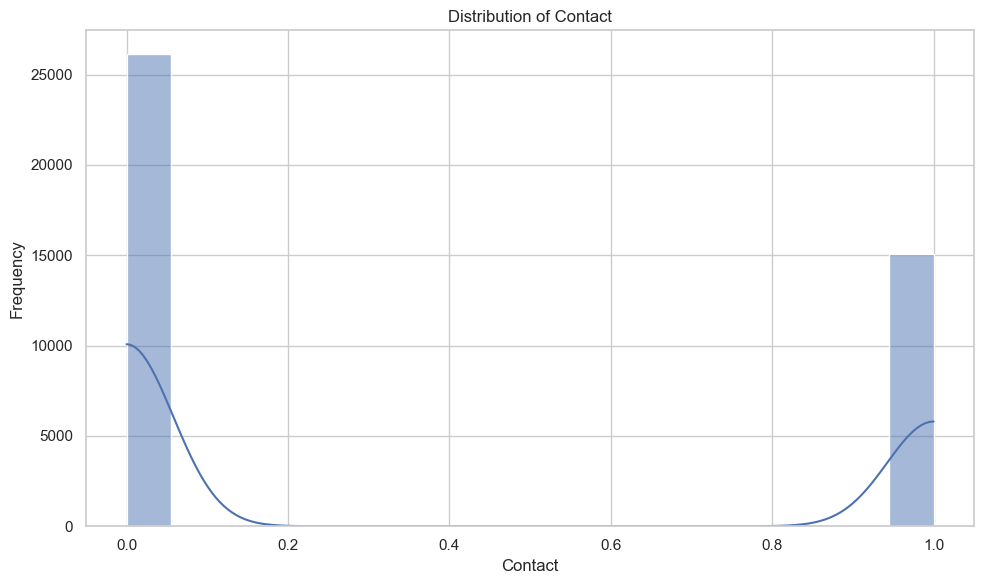

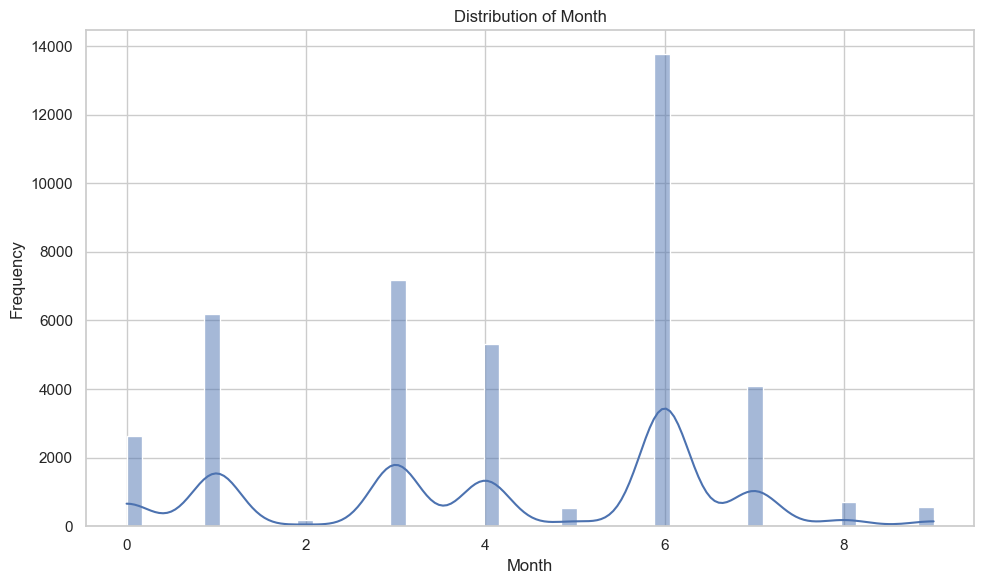

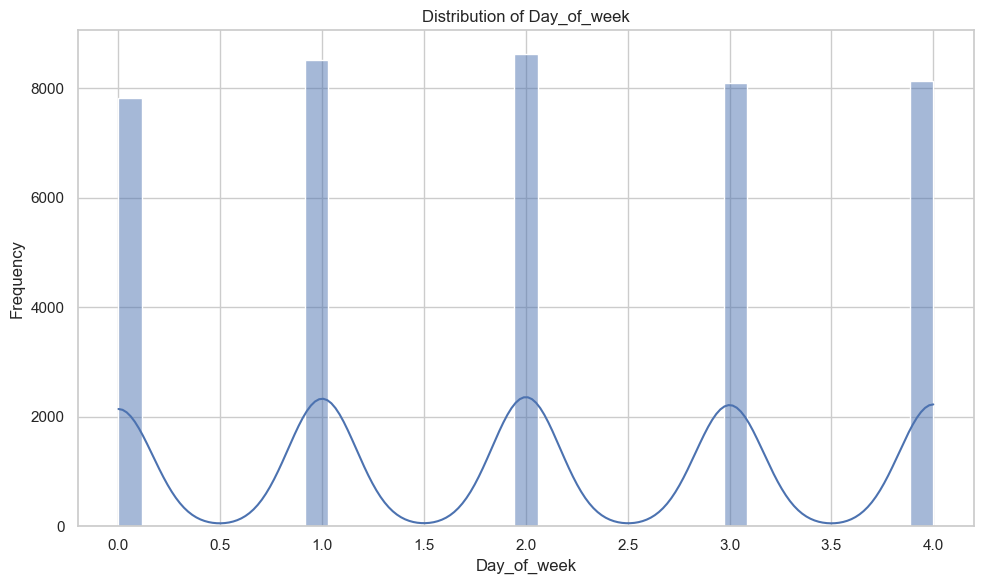

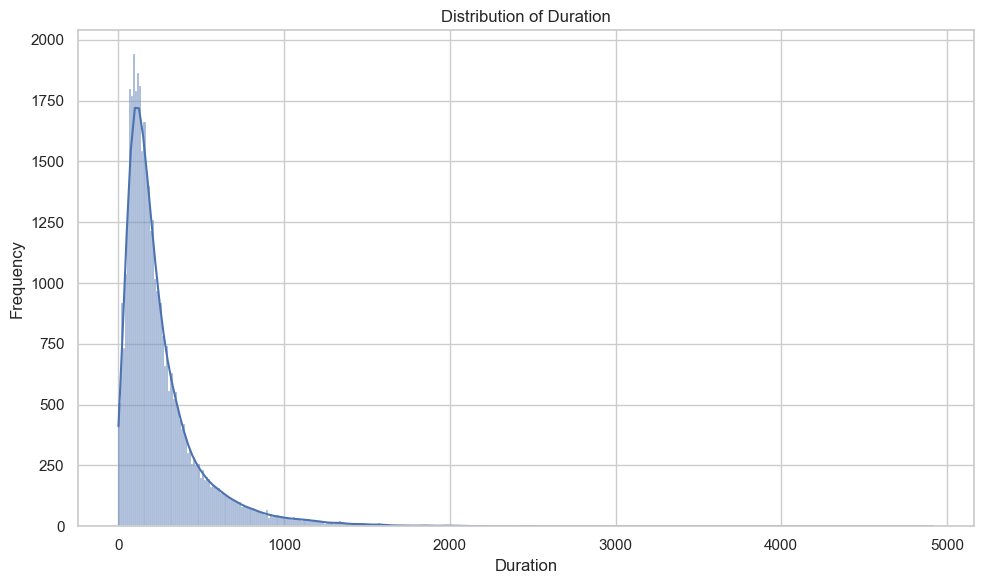

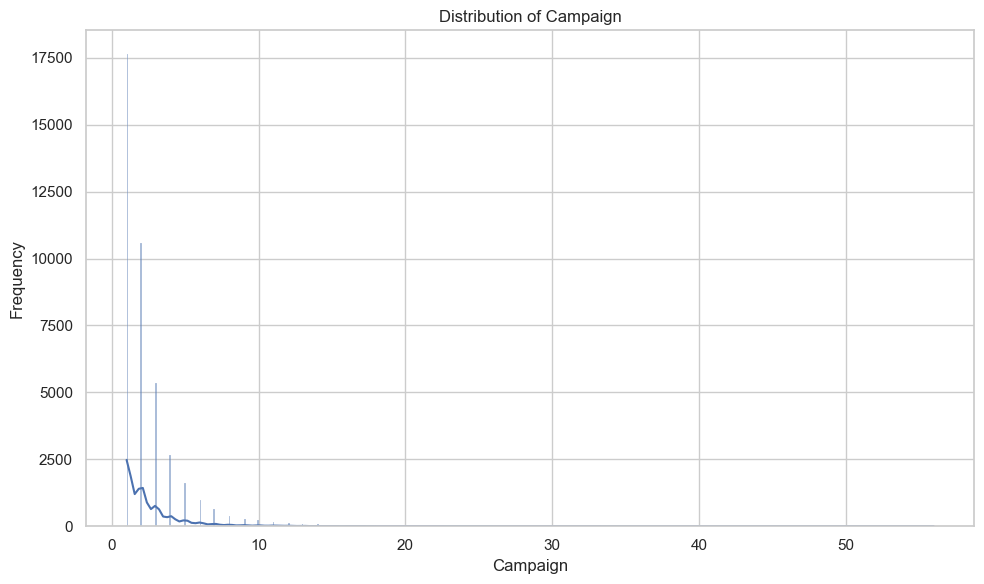

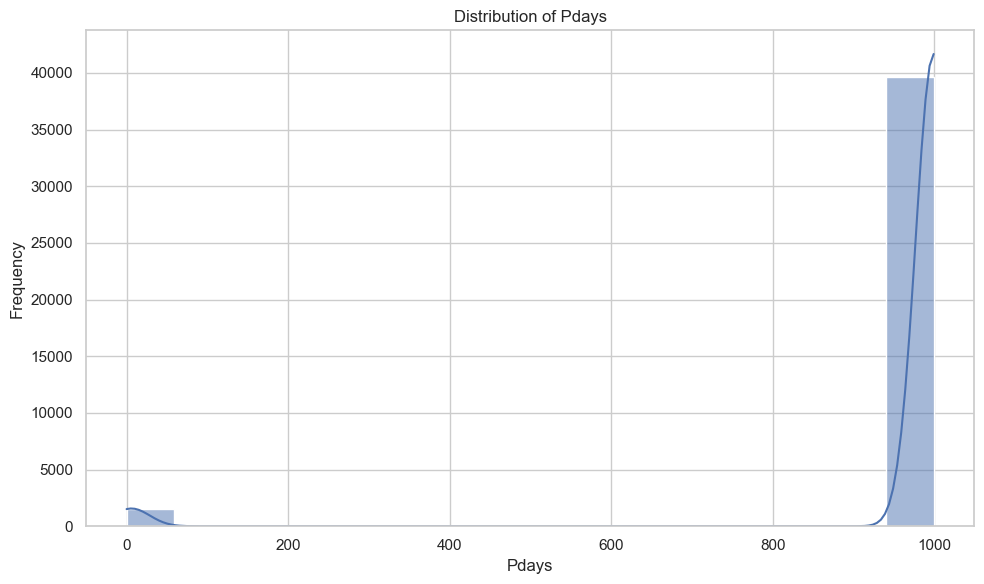

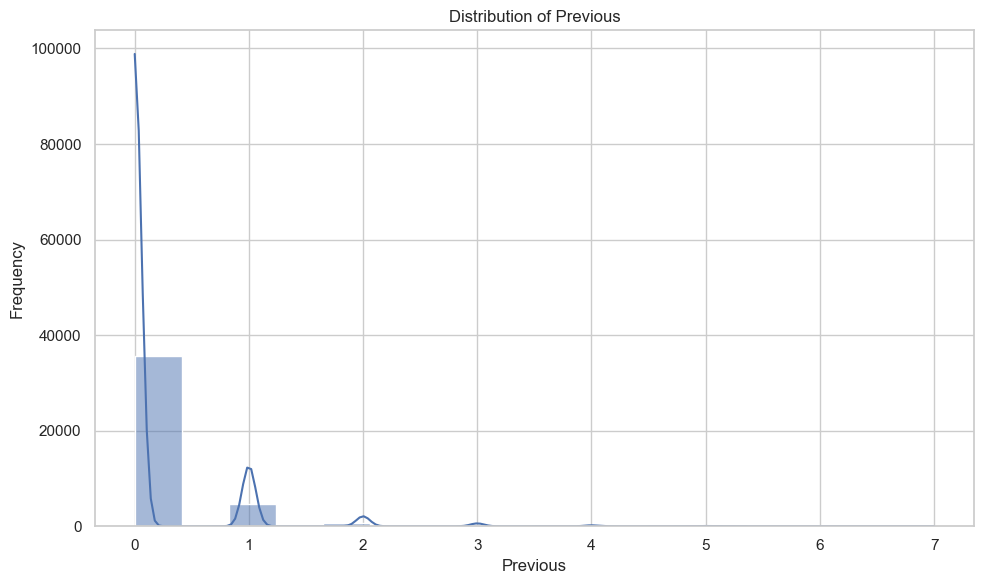

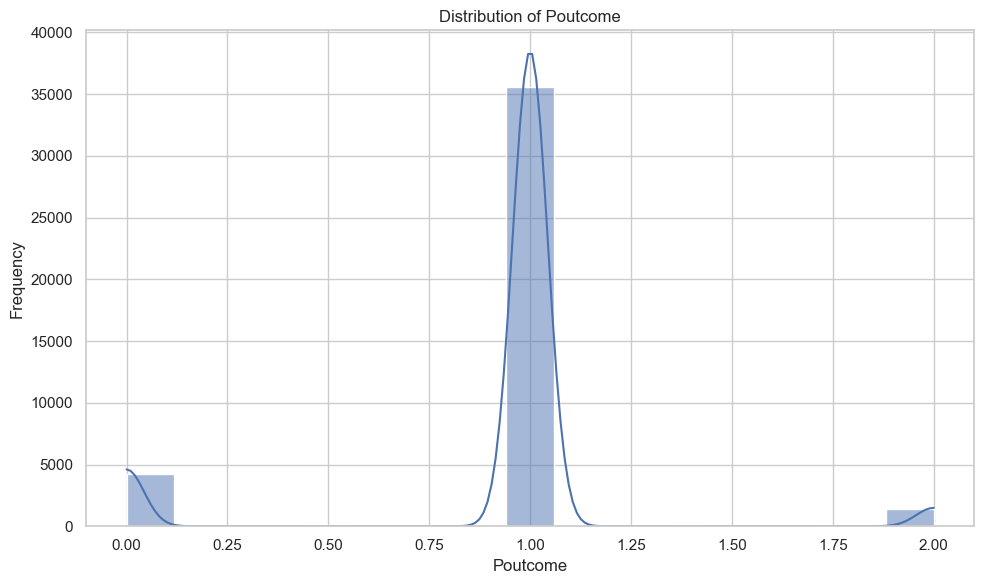

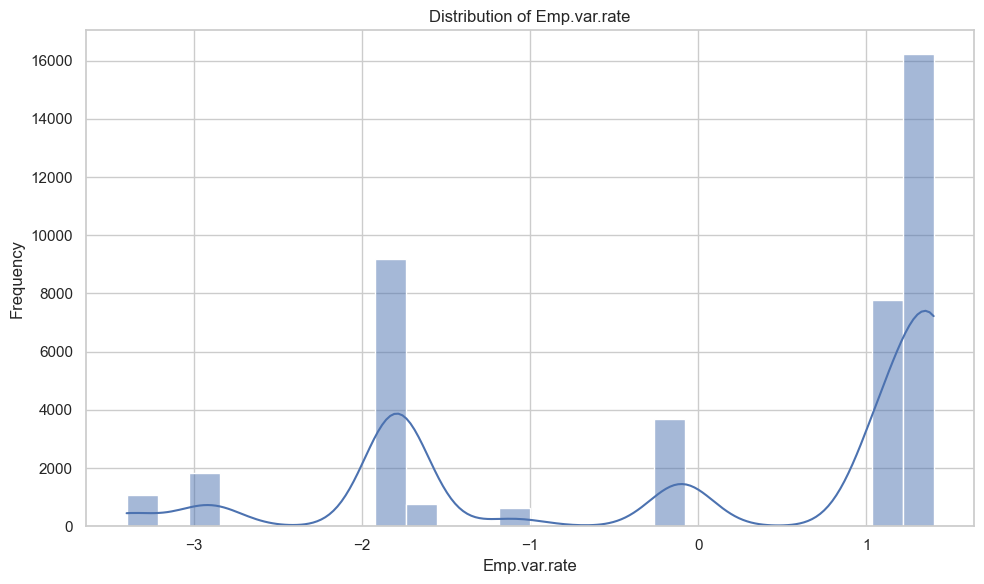

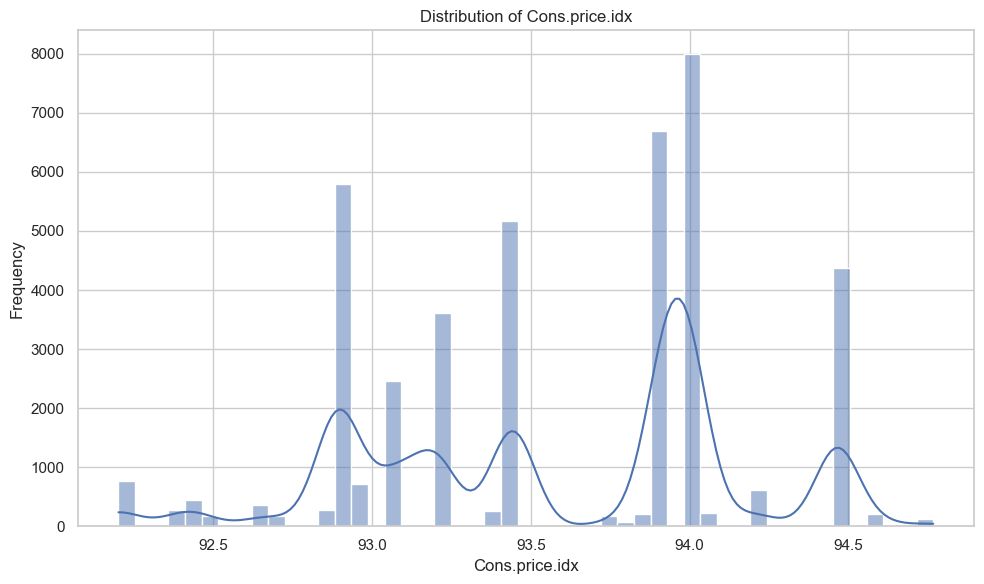

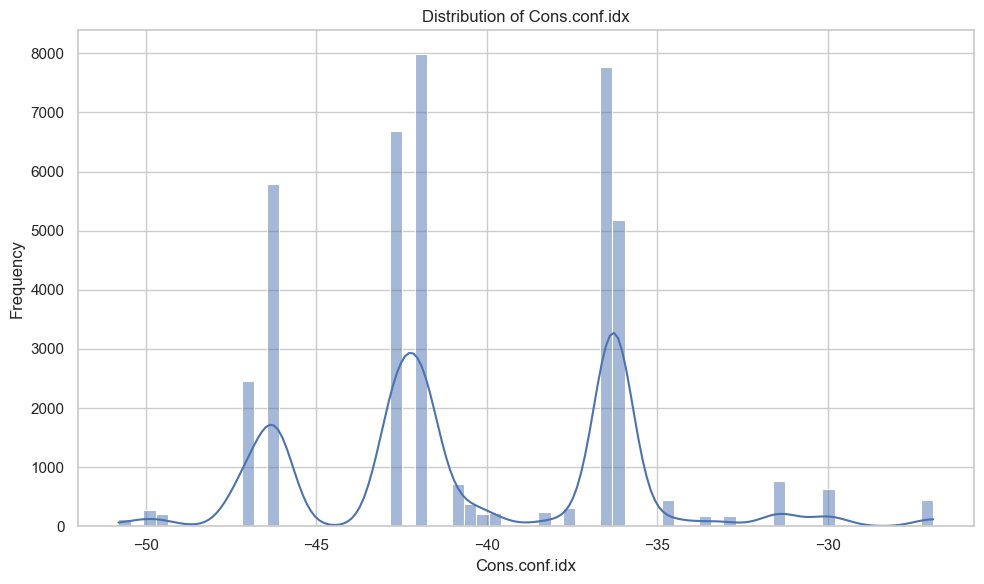

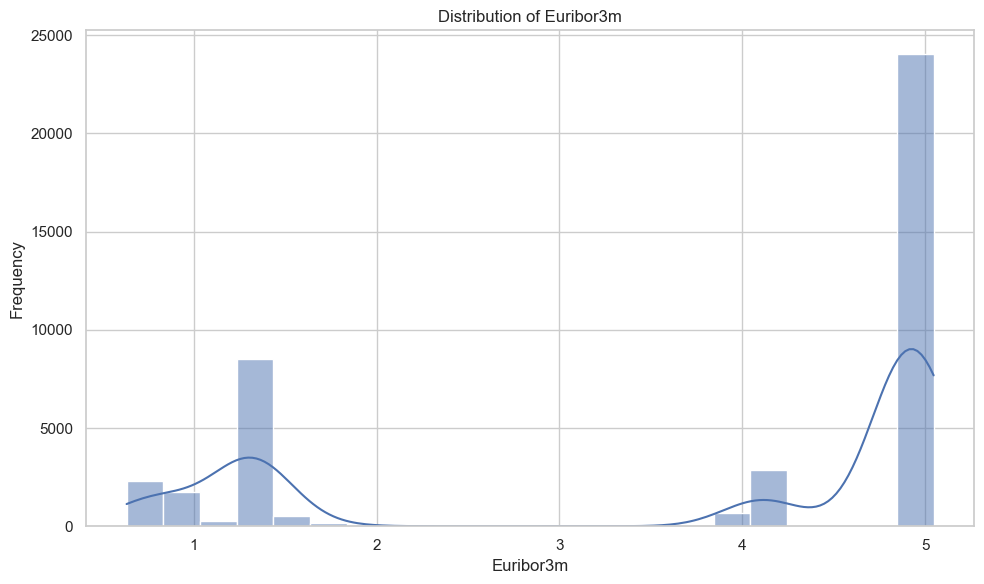

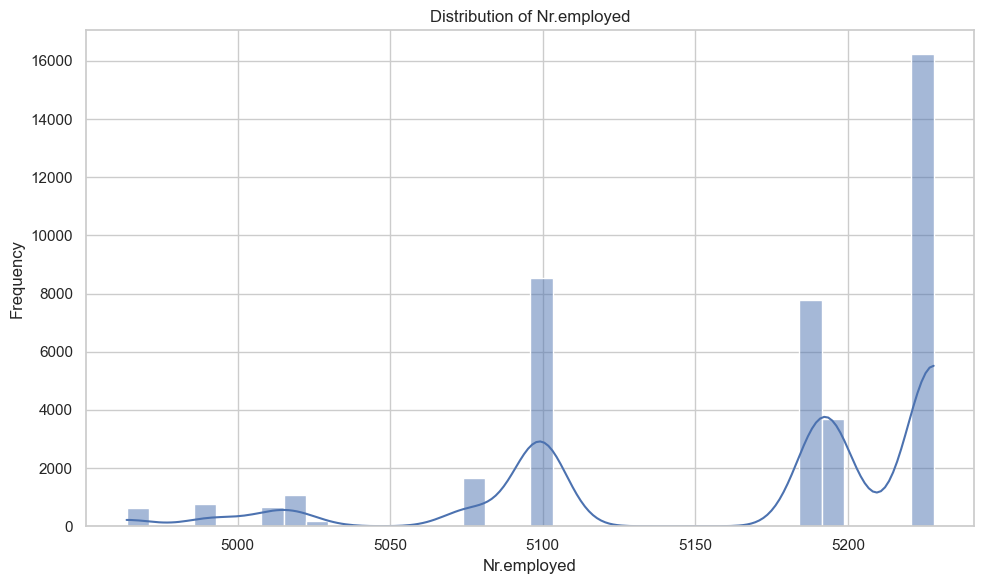

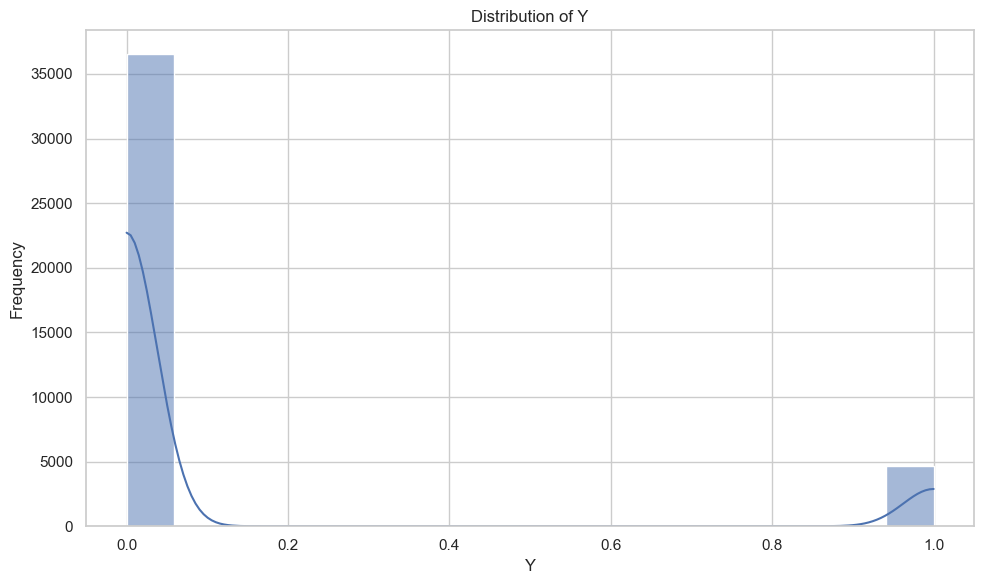

In [33]:
# Setting aesthetics for plots
sns.set(style="whitegrid")

# Function to create visualizations for both categorical and continuous variables
def create_visualizations(dataframe):
    # Identifying categorical and continuous variables
    categorical_vars = dataframe.select_dtypes(include=['object', 'category']).columns
    continuous_vars = dataframe.select_dtypes(include=['int64', 'float64']).columns

    # Plotting categorical variables
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=cat_var, data=dataframe)
        plt.title(f'Distribution of {cat_var.capitalize()}')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.xlabel(cat_var.capitalize())
        plt.tight_layout()
        plt.show()

    # Plotting continuous variables
    for cont_var in continuous_vars:
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[cont_var], kde=True)
        plt.title(f'Distribution of {cont_var.capitalize()}')
        plt.ylabel('Frequency')
        plt.xlabel(cont_var.capitalize())
        plt.tight_layout()
        plt.show()

# Call the function with the dataframe to generate the visualizations
create_visualizations(data)
